# Concrete Compressive Strength

<img src= "images/concrete.jpg">

#### Problem 1: Regression

Develop a machine learning model that can predict the Concrete Compressive Strength for a particular concrete recipe given the quantities for input ingredients and a number of days (Age) for curing the concrete.

This is a baseline model.  What we are primarily interested in here is:

1. Making sure that the data is properly formatted for scikit-learn.
2. Identifying and separating features (X) and target (y).
3. Having a base score for the model that we can use to measure progress.
4. Validating that we have enough data for both training and testing.
5. Use at least 7 conventional machine learning algorithms and DEEP LEARNING (Tensorflow - Keras or Pytorch) to predict Concrete Compressive Strength

#### Problem 2: Classification

Develop a machine learning model that can predict the ConcreteClass for a particular concrete recipe.

Take concrete regression data and modify it to be suitable for  classification examples.

### Importing Required Packages

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

### Importing Data

In [205]:
df = pd.read_excel('data/Concrete_Data.xls')

## EDA - Exploratory Data Analysis

In [206]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [207]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [208]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [209]:
df.shape

(1030, 9)

In [210]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   int64  
 8   Strength     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [211]:
df.describe()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [212]:
df.isnull().sum()

Cement         0
Slag           0
FlyAsh         0
Water          0
Plasticizer    0
CoarseAgg      0
FineAgg        0
Age            0
Strength       0
dtype: int64

In [213]:
def corr_sort(data, column):
    return abs(data.corr(numeric_only=True)[column]).sort_values(ascending=False)

corr_sort(df, 'Strength')  

Strength       1.000000
Cement         0.497833
Plasticizer    0.366102
Age            0.328877
Water          0.289613
FineAgg        0.167249
CoarseAgg      0.164928
Slag           0.134824
FlyAsh         0.105753
Name: Strength, dtype: float64

### Dropping Duplicates

In [214]:
df.drop_duplicates(inplace=True)

### Data Visualization

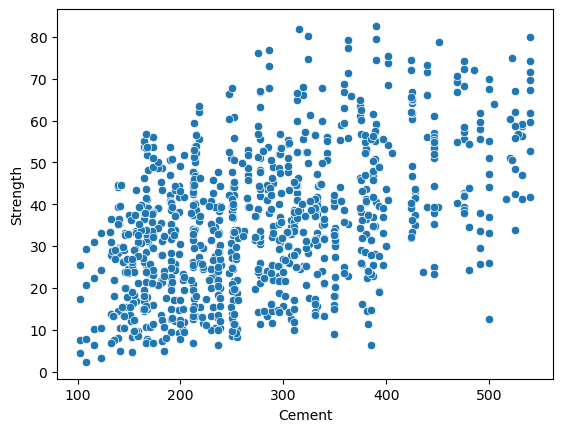

In [215]:
sns.scatterplot(x='Cement', y='Strength', data=df);

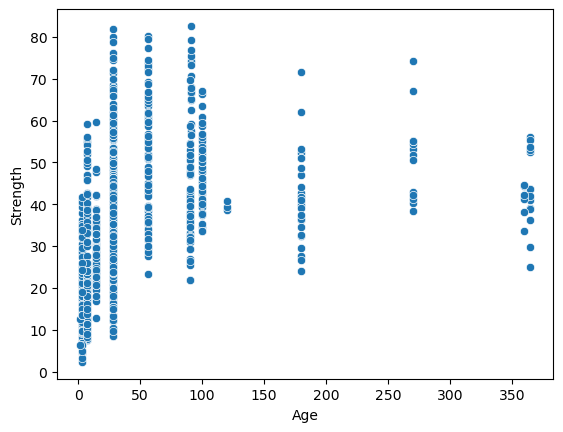

In [216]:
sns.scatterplot(x='Age', y='Strength', data=df);

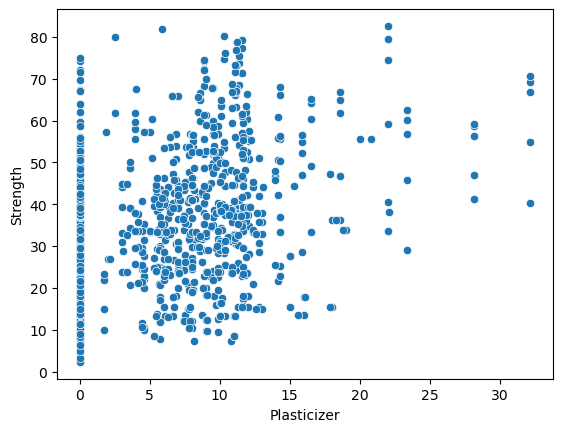

In [217]:
sns.scatterplot(x='Plasticizer', y='Strength', data=df);

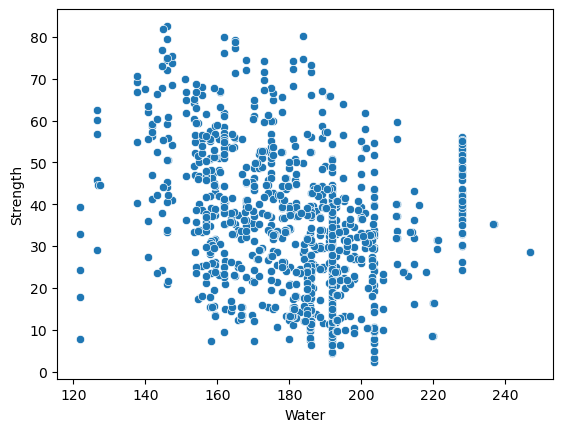

In [218]:
sns.scatterplot(x='Water', y='Strength', data=df);

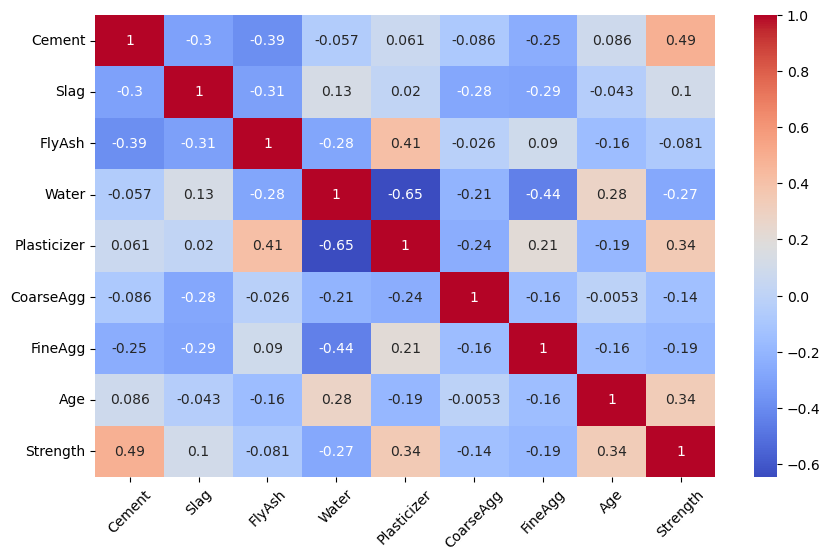

In [219]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.xticks(rotation=45);

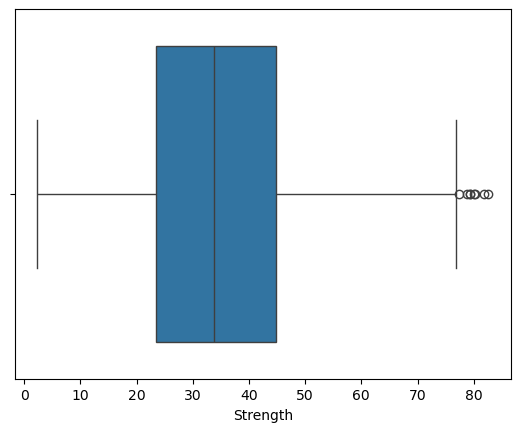

In [220]:
sns.boxplot(x='Strength', data=df);

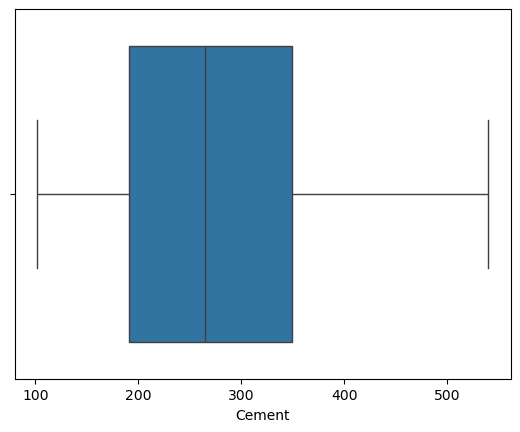

In [221]:
sns.boxplot(x='Cement', data=df);

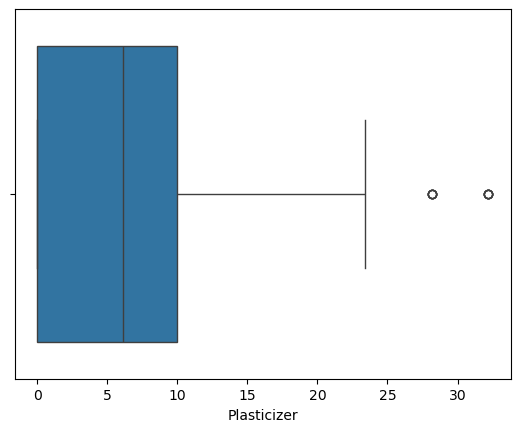

In [222]:
sns.boxplot(x='Plasticizer', data=df);

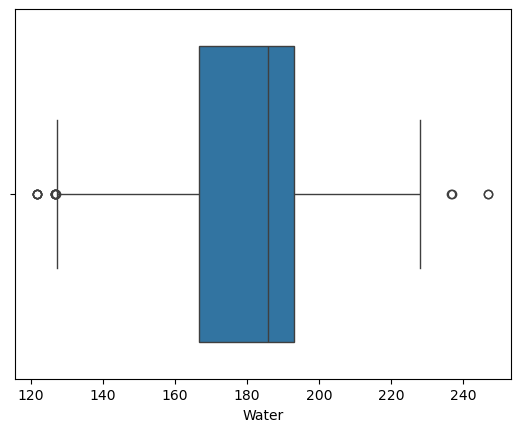

In [223]:
sns.boxplot(x='Water', data=df);

## Modelling with Machine Learning

In [224]:
x = df.drop('Strength', axis=1)
y = df['Strength']

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [226]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,9.309601e-01,4.538340e+00,2.738201e+00
Gradient Boosting,8.978726e-01,5.519736e+00,4.085638e+00
Decision Tree,8.605120e-01,6.450829e+00,3.940522e+00
Extra Tree,8.236513e-01,7.253260e+00,4.412393e+00
KNeighborsRegressor,7.753405e-01,8.186713e+00,6.662229e+00
mlp_regressor,7.491500e-01,8.650758e+00,6.524355e+00
AdaBoost,6.988482e-01,9.478505e+00,7.246152e+00
Lasso,5.806157e-01,1.118544e+01,8.895167e+00
ElasticNet,5.805418e-01,1.118643e+01,8.894954e+00
Ridge,5.801094e-01,1.119219e+01,8.896026e+00


In [227]:
from sklearn.preprocessing import normalize, scale

In [228]:
normalized_x = normalize(x)
scaled_x = scale(x) 

In [229]:
algo_test(normalized_x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.892916,5.652084,3.199419
Gradient Boosting,0.885563,5.842913,4.137061
Extra Tree,0.856850,6.534957,4.308777
Decision Tree,0.796264,7.796165,4.575652
KNeighborsRegressor,0.782898,8.047832,6.447065
AdaBoost,0.681547,9.746972,7.352782
Linear,0.622718,10.609134,8.186463
Ridge,0.408470,13.284206,10.668964
SGD,0.359998,13.817769,11.134464
SVR,0.200608,15.442832,12.326300


In [230]:
algo_test(scaled_x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.930960,4.538340,2.738201
Gradient Boosting,0.898375,5.506138,4.088781
Decision Tree,0.872725,6.161968,3.844104
Extra Tree,0.815926,7.410436,4.446463
KNeighborsRegressor,0.792417,7.869434,6.374410
AdaBoost,0.714956,9.221530,7.158175
SVR,0.596268,10.974723,8.393166
Linear,0.580109,11.192200,8.896028
Ridge,0.579955,11.194251,8.898335
SGD,0.579078,11.205928,8.899710


## Modelling with Deep Learning

In [231]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [233]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [234]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2000, batch_size=128)

Epoch 1/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 567.3055 - val_loss: 254.4323
Epoch 2/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 212.8063 - val_loss: 229.3934
Epoch 3/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179.9767 - val_loss: 175.7948
Epoch 4/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.0754 - val_loss: 191.2318
Epoch 5/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 132.7863 - val_loss: 143.1474
Epoch 6/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.8661 - val_loss: 137.6422
Epoch 7/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.9562 - val_loss: 132.1674
Epoch 8/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.5857 - val_loss: 121.4463
Epoch 9/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.5351 - val_loss: 123.9585
Epoch 10/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 101.1564 - val_loss: 106.5693
Epoch 11/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.2991 - val_loss: 98.9917
Epoch 12/2000
7/7 ━━━━━━━━━━━━━━━━━

In [235]:
pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [236]:
r2_score(y_test, pred)

0.9194670275970803

## Feature Importance

In [237]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [238]:
pred = lr.predict(x_test)

In [239]:
feature_importance = pd.DataFrame({'feature': x_train.columns, 'Coefs': lr.coef_})
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

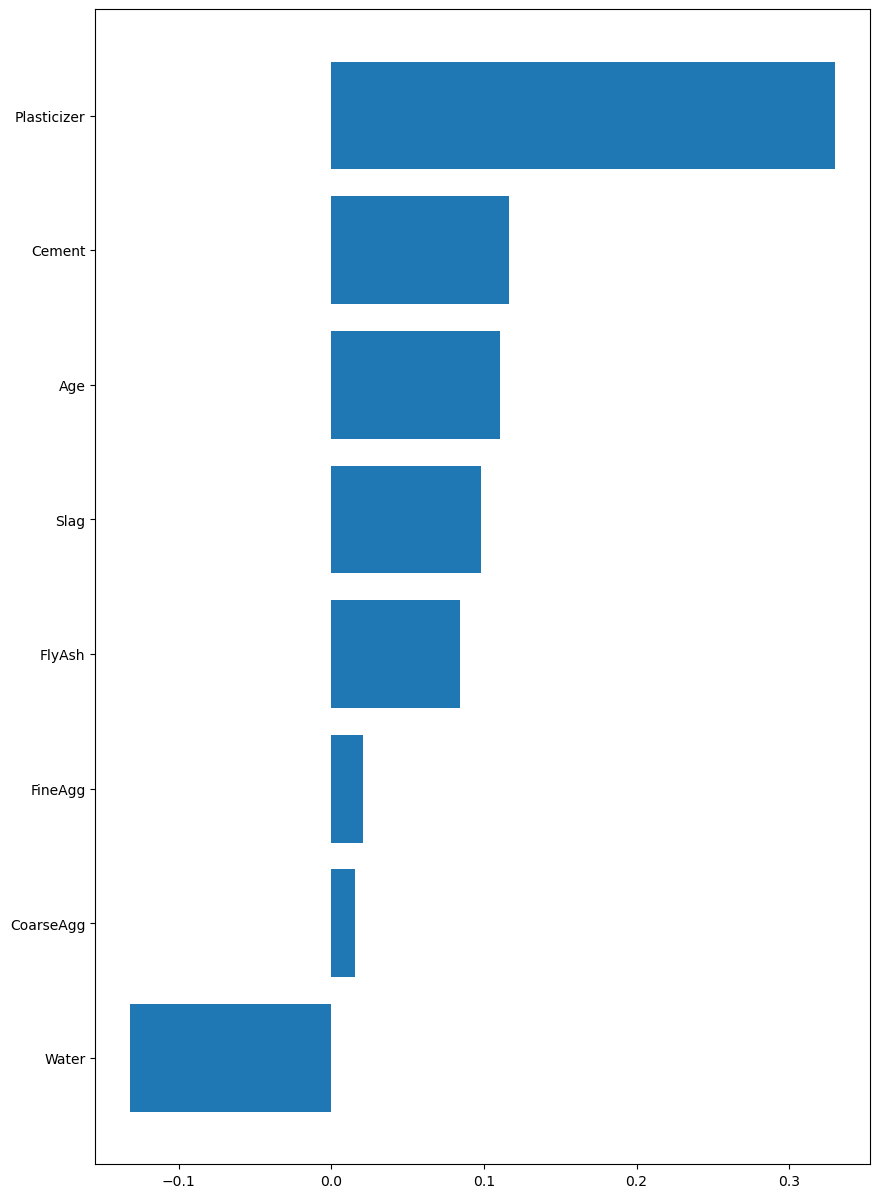

In [240]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.barh(feature_importance.feature, feature_importance.Coefs)
plt.gca().invert_yaxis()
plt.show()

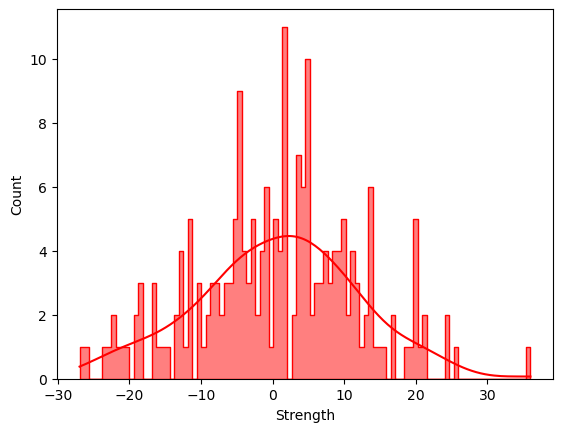

In [241]:
residuals =y_test - pred 
sns.histplot(residuals, kde=True, bins=100, color='red', alpha=0.5, label='Residuals', element='step');

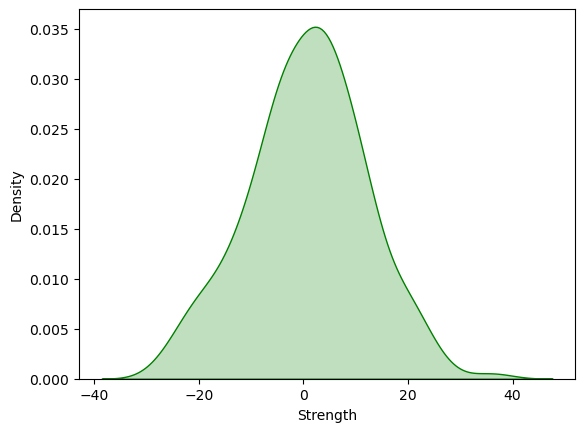

In [242]:
sns.kdeplot(residuals, color='green', fill=True);

## Classification

In [243]:
def green_classifier(s):
    """
    Use numeric data to create a Green categorical feature.
    """

    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"


def strength_classifer(x):
    """
    Use numeric data to create a ConcreteClass categorical feature.  This is
    based on "CIP 35 - Testing Compressive Strength of Concrete", National
    Ready Mixed Concrete Association (www.nrmca.org), 2003 & 2014.
    """

    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"


df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df.Strength.apply(strength_classifer)

# convert Plasticizer to text (the numeric values are embedded in Green)
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")

# remove Strength feature as replaced by categorical target ConcreteClass
df.drop("Strength", axis=1, inplace=True)

### Modelling with Machine Learning

In [244]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,n/a,high-strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,n/a,commercial


In [245]:
df['ConcreteClass'].value_counts()  

ConcreteClass
commercial        618
residential       212
non-structural    148
high-strength      27
Name: count, dtype: int64

In [288]:
x = df.drop('ConcreteClass', axis=1)
y = df[['ConcreteClass']]

In [289]:
x = pd.get_dummies(x)

In [290]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')

In [291]:
algo_test(x,y)

Algorithm:
 GaussianNB
Confusion Matrix:
 [[92  6  4 16]
 [ 8  2  0  0]
 [ 0  0 29  9]
 [22  0  2 11]]
Classification Report: 
                 precision    recall  f1-score   support

    commercial       0.75      0.78      0.77       118
 high-strength       0.25      0.20      0.22        10
non-structural       0.83      0.76      0.79        38
   residential       0.31      0.31      0.31        35

      accuracy                           0.67       201
     macro avg       0.53      0.51      0.52       201
  weighted avg       0.66      0.67      0.67       201

Accuracy Score:
 0.6666666666666666
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[95  6 19 23]
 [ 0  0  0  0]
 [27  2 16 13]
 [ 0  0  0  0]]
Classification Report: 
                 precision    recall  f1-score   support

    commercial       0.78      0.66      0.72       143
 high-strength       0.00      0.00      0.00         0
non-structural       0.46 

## Modelling with Neural Network

In [292]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [297]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [299]:
history = model.fit(x, y, epochs=250, batch_size=32, validation_split=0.2, verbose=1) 

Epoch 1/250


AttributeError: 'NoneType' object has no attribute 'items'